In [11]:
from Logical import LogicalCircuit

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# clearing lib cache during development to force-update imports
import sys, importlib
importlib.reload(sys.modules['Logical'])

<module 'Logical' from '/home/rasmitdevkota/projects/QCA/gatech-qec-project/src/Logical.py'>

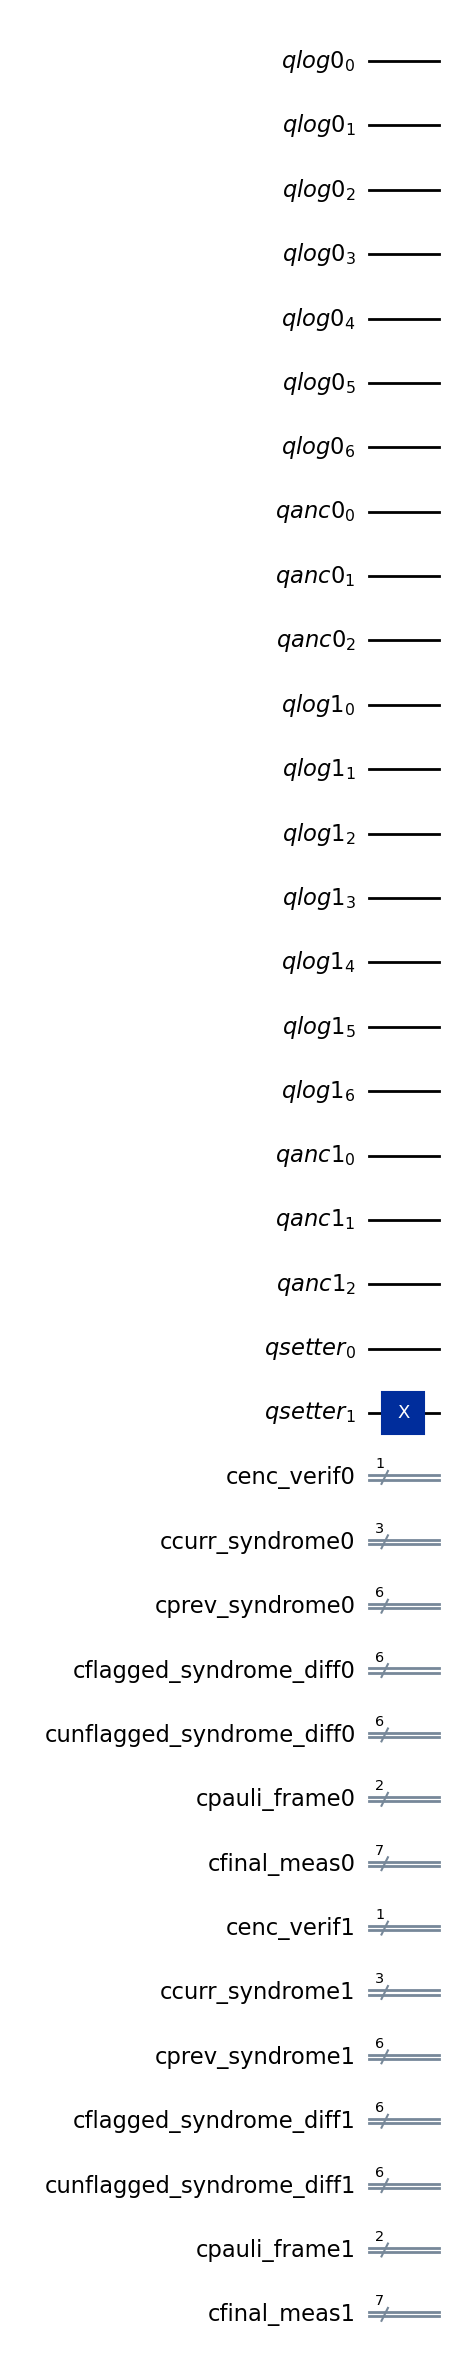

In [12]:
# create LogicalCircuit to store logical qubits
stabilizer_tableau = [
  "XXXXIII",
  "IXXIIXX",
  "XIXIXIX",
  "ZZZZIII",
  "IZZIIZZ",
  "ZIZIZIZ",
]

lqcirc = LogicalCircuit(2, stabilizer_tableau, name="SteaneCodeCircuit")
lqcirc.draw("mpl")

# q = [QuantumRegister(7, name=f"q{i}") for i in range(3)]
# c = [ClassicalRegister(3) for i in range(3)]
# tri = QuantumCircuit(*q, *c)
# tri.draw("mpl")

In [13]:
# Logical state preparation
lqcirc.encode(0, max_iterations=3)
lqcirc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=22, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'qlog0'), 0), Qubit(QuantumRegister(7, 'qlog0'), 1), Qubit(QuantumRegister(7, 'qlog0'), 2), Qubit(QuantumRegister(7, 'qlog0'), 3), Qubit(QuantumRegister(7, 'qlog0'), 4), Qubit(QuantumRegister(7, 'qlog0'), 5), Qubit(QuantumRegister(7, 'qlog0'), 6), AncillaQubit(AncillaRegister(3, 'qanc0'), 0), AncillaQubit(AncillaRegister(3, 'qanc0'), 1), AncillaQubit(AncillaRegister(3, 'qanc0'), 2), Qubit(QuantumRegister(7, 'qlog1'), 0), Qubit(QuantumRegister(7, 'qlog1'), 1), Qubit(QuantumRegister(7, 'qlog1'), 2), Qubit(QuantumRegister(7, 'qlog1'), 3), Qubit(QuantumRegister(7, 'qlog1'), 4), Qubit(QuantumRegister(7, 'qlog1'), 5), Qubit(QuantumRegister(7, 'qlog1'), 6), AncillaQubit(AncillaRegister(3, 'qanc1'), 0), AncillaQubit(AncillaRegister(3, 'qanc1'), 1), AncillaQubit(AncillaRegister(3, 'qanc1'), 2), Qubit(QuantumRegister(2, 'qsetter'), 0), Qubit(QuantumRegister(2, 'qsett

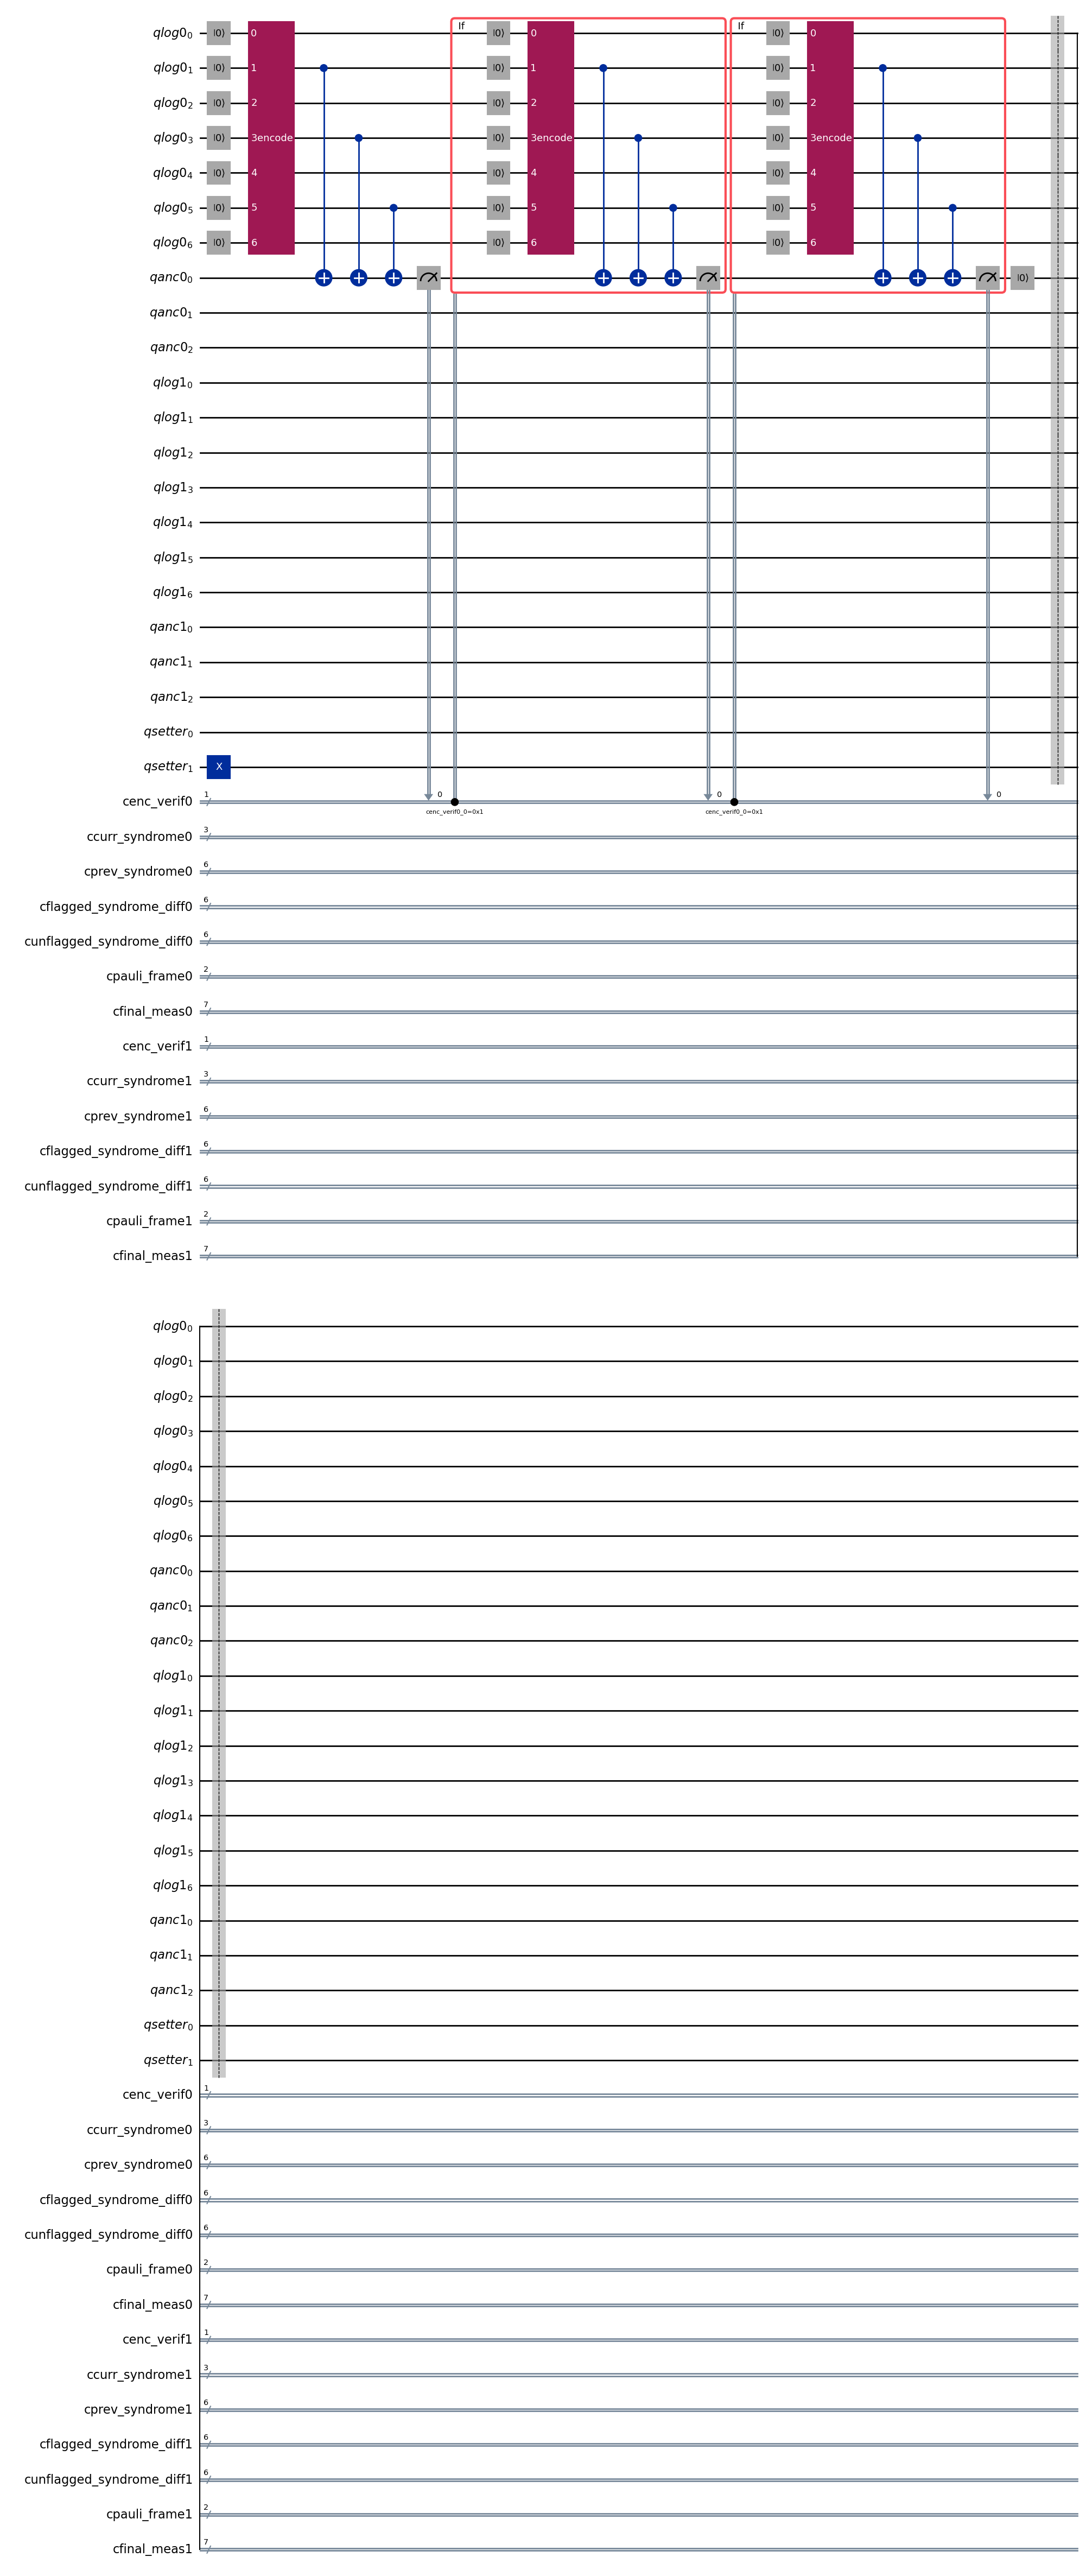

In [14]:
lqcirc.draw("mpl")

In [15]:
# Option 1: Automatic QEC cycling
lqcirc.configure_qec_cycle(sample_rate=["Depth", 5])
# <insert algorithm code>

# Option 2: Manually trigger QEC cycles
# <insert some algorithm steps>
lqcirc.perform_qec_cycle()
# <insert some algorithm steps>
lqcirc.perform_qec_cycle()
# <insert some algorithm steps>
# ...

NotImplementedError: QEC Cycle configuration has not yet been implemented.

In [ ]:
# measure all qubits
lqcirc.measure_all()

In [ ]:
lqcirc.draw("mpl")

In [ ]:
import itertools

# transpile circuit with no optimization to preserve RB circuit
noisy_sim = AerSimulator(method="density_matrix")

fully_coupled_map = itertools.product(range(lqcirc.num_qubits), range(lqcirc.num_qubits))
fully_coupled_map = [list(pair) for pair in fully_coupled_map]

noisy_circuit_transpiled = transpile(lqcirc, noisy_sim, coupling_map=fully_coupled_map, optimization_level=0)

result = noisy_sim.run(noisy_circuit_transpiled).result()
print(result)
print(f"Simulation status: '{result.status}'")
print(f"Memory requirement: {result.results[0].metadata['required_memory_mb']} MB")

counts = result.get_counts(noisy_circuit_transpiled)